In [1]:
import argparse
import numpy as np
import pandas as pd
import pickle
import copy
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets,transforms
from torch import optim
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, TensorDataset
import os
import random
from tqdm import tqdm
import torch.nn.functional as F
from collections import Counter
from itertools import islice
import itertools

In [2]:
with open('mnist_ba_plus_rounds_0', 'rb') as f:
    rounds = pickle.load(f)

In [3]:
marker = itertools.cycle(('o', 'v', '^', 's', '8', '<', '>','p'))
#marker = itertools.cycle(('o', 'v', '^', '>','p'))
from matplotlib.lines import Line2D

In [4]:
with open('mnist_ba_plus_acc_0', 'rb') as f:
    acc_0 = pickle.load(f)

In [5]:
with open('mnist_ba_plus_basr_0', 'rb') as f:
    basr_0 = pickle.load(f)

In [6]:
with open('mnist_ba_plus_acc_3', 'rb') as f:
    acc_3 = pickle.load(f)
with open('mnist_ba_plus_basr_3', 'rb') as f:
    basr_3 = pickle.load(f)
with open('mnist_ba_plus_acc_6', 'rb') as f:
    acc_6 = pickle.load(f)
with open('mnist_ba_plus_basr_6', 'rb') as f:
    basr_6 = pickle.load(f)
with open('mnist_ba_plus_acc_9', 'rb') as f:
    acc_9 = pickle.load(f)
with open('mnist_ba_plus_basr_9', 'rb') as f:
    basr_9 = pickle.load(f)
with open('mnist_ba_plus_acc_12', 'rb') as f:
    acc_12 = pickle.load(f)
with open('mnist_ba_plus_basr_12', 'rb') as f:
    basr_12 = pickle.load(f)
with open('mnist_ba_plus_acc_15', 'rb') as f:
    acc_15 = pickle.load(f)
with open('mnist_ba_plus_basr_15', 'rb') as f:
    basr_15 = pickle.load(f)
with open('mnist_ba_plus_acc_18', 'rb') as f:
    acc_18 = pickle.load(f)
with open('mnist_ba_plus_basr_18', 'rb') as f:
    basr_18 = pickle.load(f)
with open('mnist_ba_plus_acc_21', 'rb') as f:
    acc_21 = pickle.load(f)
with open('mnist_ba_plus_basr_21', 'rb') as f:
    basr_21 = pickle.load(f)
with open('mnist_ba_plus_acc_24', 'rb') as f:
    acc_24 = pickle.load(f)
with open('mnist_ba_plus_basr_24', 'rb') as f:
    basr_24 = pickle.load(f)
with open('mnist_ba_plus_acc_27', 'rb') as f:
    acc_27 = pickle.load(f)
with open('mnist_ba_plus_basr_27', 'rb') as f:
    basr_27 = pickle.load(f)

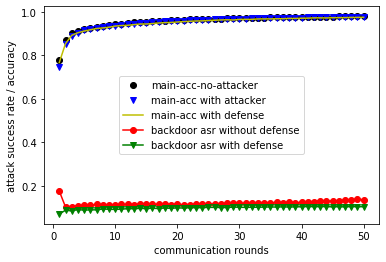

In [7]:
plt.plot(rounds[0][:50], acc_0[0][:50],'ko',label='main-acc-no-attacker')
plt.plot(rounds[0][:50], acc_3[0][:50],'bv',label='main-acc with attacker')
plt.plot(rounds[0][:50], acc_3[1][:50],'y',label='main-acc with defense')
plt.plot(rounds[0][:50], basr_3[0][:50],'r',marker=next(marker),label='backdoor asr without defense')
plt.plot(rounds[0][:50], basr_3[1][:50],'g',marker=next(marker),label='backdoor asr with defense')
#plt.title('Accuracy vs Communication rounds in Pixel-pattern backdoor attack')
plt.xlabel('communication rounds')
plt.ylabel('attack success rate / accuracy')
#colors = ['black','cyan', 'magenta','red','green']
#lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
#labels = ['main-acc-no-attacker','main-acc with attacker', 'main-acc with defense','backdoor asr without defense','backdoor asr with defense']
#plt.legend(lines, labels)
plt.legend(loc='center')
#plt.savefig('mnist_ba_plus_10_percent')

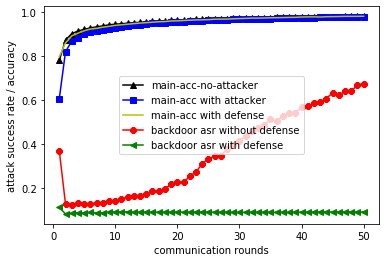

In [8]:
plt.plot(rounds[0][:50], acc_0[0][:50],'k',marker=next(marker),label='main-acc-no-attacker')
plt.plot(rounds[0][:50], acc_6[0][:50],'b',marker=next(marker),label='main-acc with attacker')
plt.plot(rounds[0][:50], acc_6[1][:50],'y',label='main-acc with defense')
plt.plot(rounds[0][:50], basr_6[0][:50],'r',marker=next(marker),label='backdoor asr without defense')
plt.plot(rounds[0][:50], basr_6[1][:50],'g',marker=next(marker),label='backdoor asr with defense')
#plt.title('Accuracy vs Communication rounds in Pixel-pattern backdoor attack')
plt.xlabel('communication rounds')
plt.ylabel('attack success rate / accuracy')
#colors = ['black','cyan', 'magenta','red','green']
#lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
#labels = ['main-acc-no-attacker','main-acc with attacker', 'main-acc with defense','backdoor asr without defense','backdoor asr with defense']
#plt.legend(lines, labels)
plt.legend(loc='center')
#plt.savefig('mnist_ba_plus_20_percent')

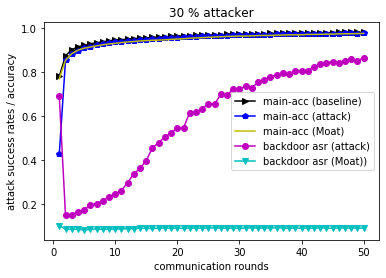

In [9]:
plt.plot(rounds[0][:50], acc_0[0][:50],'k',marker=next(marker),label='main-acc (baseline)')
plt.plot(rounds[0][:50], acc_9[0][:50],'b',marker=next(marker),label='main-acc (attack)')
plt.plot(rounds[0][:50], acc_9[1][:50],'y',label='main-acc (Moat)')
plt.plot(rounds[0][:50], basr_9[0][:50],'m',marker=next(marker),label='backdoor asr (attack)')
plt.plot(rounds[0][:50], basr_9[1][:50],'c',marker=next(marker),label='backdoor asr (Moat))')
#plt.title('Accuracy vs Communication rounds in Pixel-pattern backdoor attack')
plt.xlabel('communication rounds')
plt.ylabel('attack success rates / accuracy')
plt.title('{} % attacker'.format(30))
#colors = ['black','cyan', 'magenta','red','green']
#lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
#labels = ['main-acc-no-attacker','main-acc with attacker', 'main-acc with defense','backdoor asr without defense','backdoor asr with defense']
#plt.legend(lines, labels)
plt.legend(loc='right')
#plt.savefig('mnist_ba_plus_30_percent',bbox_inches='tight')

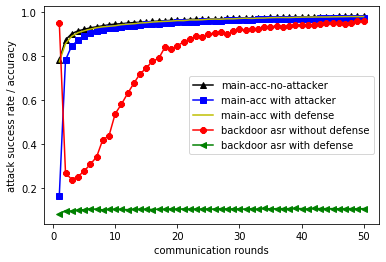

In [10]:
plt.plot(rounds[0][:50], acc_0[0][:50],'k',marker=next(marker),label='main-acc-no-attacker')
plt.plot(rounds[0][:50], acc_12[0][:50],'b',marker=next(marker),label='main-acc with attacker')
plt.plot(rounds[0][:50], acc_12[1][:50],'y',label='main-acc with defense')
plt.plot(rounds[0][:50], basr_12[0][:50],'r',marker=next(marker),label='backdoor asr without defense')
plt.plot(rounds[0][:50], basr_12[1][:50],'g',marker=next(marker),label='backdoor asr with defense')
#plt.title('Accuracy vs Communication rounds in Pixel-pattern backdoor attack')
plt.xlabel('communication rounds')
plt.ylabel('attack success rate / accuracy')
#colors = ['black','cyan', 'magenta','red','green']
#lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
#labels = ['main-acc-no-attacker','main-acc with attacker', 'main-acc with defense','backdoor asr without defense','backdoor asr with defense']
#plt.legend(lines, labels)
plt.legend(loc='center right')
#plt.savefig('mnist_ba_plus_40_percent')

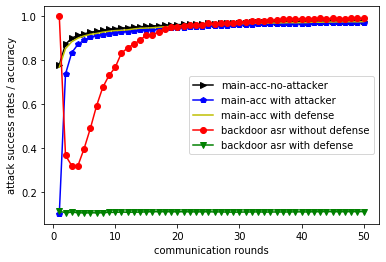

In [11]:
plt.plot(rounds[0][:50], acc_0[0][:50],'k',marker=next(marker),label='main-acc-no-attacker')
plt.plot(rounds[0][:50], acc_15[0][:50],'b',marker=next(marker),label='main-acc with attacker')
plt.plot(rounds[0][:50], acc_15[1][:50],'y',label='main-acc with defense')
plt.plot(rounds[0][:50], basr_15[0][:50],'r',marker=next(marker),label='backdoor asr without defense')
plt.plot(rounds[0][:50], basr_15[1][:50],'g',marker=next(marker),label='backdoor asr with defense')
#plt.title('Accuracy vs Communication rounds in Pixel-pattern backdoor attack')
plt.xlabel('communication rounds')
plt.ylabel('attack success rates / accuracy')
#colors = ['black','cyan', 'magenta','red','green']
#lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
#labels = ['main-acc-no-attacker','main-acc with attacker', 'main-acc with defense','backdoor asr without defense','backdoor asr with defense']
#plt.legend(lines, labels)
plt.legend(loc='center right')
#plt.savefig('mnist_ba_plus_50_percent')

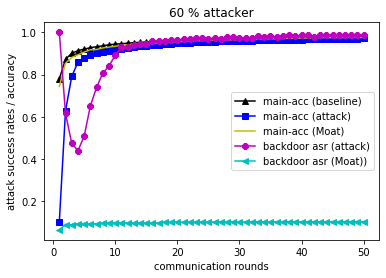

In [12]:
plt.plot(rounds[0][:50], acc_0[0][:50],'k',marker=next(marker),label='main-acc (baseline)')
plt.plot(rounds[0][:50], acc_18[0][:50],'b',marker=next(marker),label='main-acc (attack)')
plt.plot(rounds[0][:50], acc_18[1][:50],'y',label='main-acc (Moat)')
plt.plot(rounds[0][:50], basr_18[0][:50],'m',marker=next(marker),label='backdoor asr (attack)')
plt.plot(rounds[0][:50], basr_18[1][:50],'c',marker=next(marker),label='backdoor asr (Moat))')
#plt.title('Accuracy vs Communication rounds in Pixel-pattern backdoor attack')
plt.xlabel('communication rounds')
plt.ylabel('attack success rates / accuracy')
plt.title('{} % attacker'.format(60))
#colors = ['black','cyan', 'magenta','red','green']
#lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
#labels = ['main-acc-no-attacker','main-acc with attacker', 'main-acc with defense','backdoor asr without defense','backdoor asr with defense']
#plt.legend(lines, labels)
plt.legend(loc='right')
#plt.savefig('mnist_ba_plus_60_percent',bbox_inches='tight')

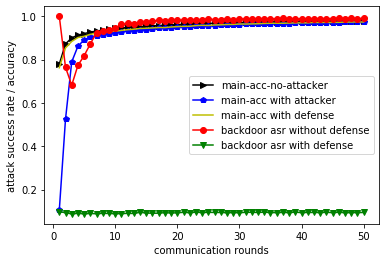

In [13]:
plt.plot(rounds[0][:50], acc_0[0][:50],'k',marker=next(marker),label='main-acc-no-attacker')
plt.plot(rounds[0][:50], acc_21[0][:50],'b',marker=next(marker),label='main-acc with attacker')
plt.plot(rounds[0][:50], acc_21[1][:50],'y',label='main-acc with defense')
plt.plot(rounds[0][:50], basr_21[0][:50],'r',marker=next(marker),label='backdoor asr without defense')
plt.plot(rounds[0][:50], basr_21[1][:50],'g',marker=next(marker),label='backdoor asr with defense')
#plt.title('Accuracy vs Communication rounds in Pixel-pattern backdoor attack')
plt.xlabel('communication rounds')
plt.ylabel('attack success rate / accuracy')
#colors = ['black','cyan', 'magenta','red','green']
#lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
#labels = ['main-acc-no-attacker','main-acc with attacker', 'main-acc with defense','backdoor asr without defense','backdoor asr with defense']
#plt.legend(lines, labels)
plt.legend(loc='center right')
#plt.savefig('mnist_ba_plus_70_percent')

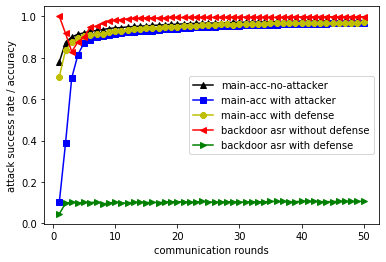

In [14]:
plt.plot(rounds[0][:50], acc_0[0][:50],'k',marker=next(marker),label='main-acc-no-attacker')
plt.plot(rounds[0][:50], acc_24[0][:50],'b',marker=next(marker),label='main-acc with attacker')
plt.plot(rounds[0][:50], acc_24[1][:50],'y',marker=next(marker),label='main-acc with defense')
plt.plot(rounds[0][:50], basr_24[0][:50],'r',marker=next(marker),label='backdoor asr without defense')
plt.plot(rounds[0][:50], basr_24[1][:50],'g',marker=next(marker),label='backdoor asr with defense')
#plt.title('Accuracy vs Communication rounds in Pixel-pattern backdoor attack')
plt.xlabel('communication rounds')
plt.ylabel('attack success rate / accuracy')
#colors = ['black','cyan', 'magenta','red','green']
#lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
#labels = ['main-acc-no-attacker','main-acc with attacker', 'main-acc with defense','backdoor asr without defense','backdoor asr with defense']
#plt.legend(lines, labels)
plt.legend(loc='center right')
#plt.savefig('mnist_ba_plus_80_percent')

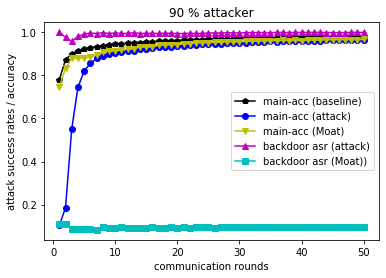

In [15]:
plt.plot(rounds[0][:50], acc_0[0][:50],'k',marker=next(marker),label='main-acc (baseline)')
plt.plot(rounds[0][:50], acc_27[0][:50],'b',marker=next(marker),label='main-acc (attack)')
plt.plot(rounds[0][:50], acc_27[1][:50],'y',marker=next(marker),label='main-acc (Moat)')
plt.plot(rounds[0][:50], basr_27[0][:50],'m',marker=next(marker),label='backdoor asr (attack)')
plt.plot(rounds[0][:50], basr_27[1][:50],'c',marker=next(marker),label='backdoor asr (Moat))')
#plt.title('Accuracy vs Communication rounds in Pixel-pattern backdoor attack')
plt.xlabel('communication rounds')
plt.ylabel('attack success rates / accuracy')
plt.title('{} % attacker'.format(90))
#colors = ['black','cyan', 'magenta','red','green']
#lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
#labels = ['main-acc-no-attacker','main-acc with attacker', 'main-acc with defense','backdoor asr without defense','backdoor asr with defense']
#plt.legend(lines, labels)
plt.legend(loc='right')
#plt.savefig('mnist_ba_plus_90_percent',bbox_inches='tight')

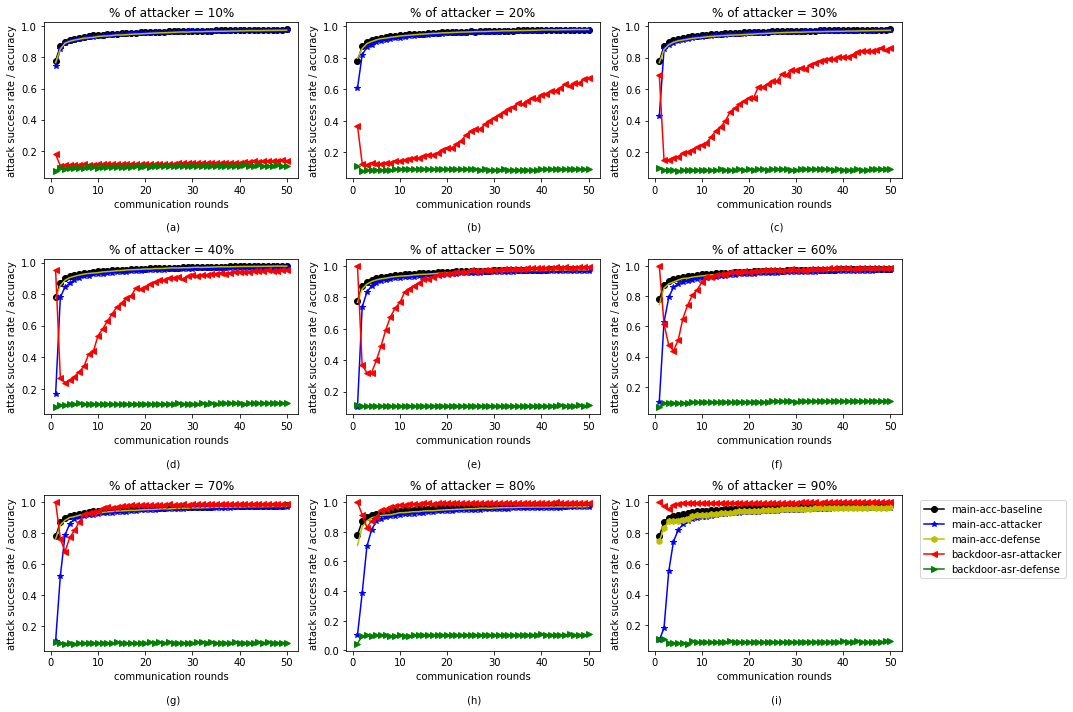

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

axes[0,0].plot(rounds[0][:50], acc_0[0][:50],'k',marker='o')
axes[0,0].plot(rounds[0][:50], acc_3[0][:50],'b',marker='*')
axes[0,0].plot(rounds[0][:50], acc_3[1][:50],'y')
axes[0,0].plot(rounds[0][:50], basr_3[0][:50],'r',marker='<')
axes[0,0].plot(rounds[0][:50], basr_3[1][:50],'g',marker='>')

axes[0,1].plot(rounds[0][:50], acc_0[0][:50],'k',marker='o')
axes[0,1].plot(rounds[0][:50], acc_6[0][:50],'b',marker='*')
axes[0,1].plot(rounds[0][:50], acc_6[1][:50],'y')
axes[0,1].plot(rounds[0][:50], basr_6[0][:50],'r',marker='<')
axes[0,1].plot(rounds[0][:50], basr_6[1][:50],'g',marker='>')

axes[0,2].plot(rounds[0][:50], acc_0[0][:50],'k',marker='o')
axes[0,2].plot(rounds[0][:50], acc_9[0][:50],'b',marker='*')
axes[0,2].plot(rounds[0][:50], acc_9[1][:50],'y')
axes[0,2].plot(rounds[0][:50], basr_9[0][:50],'r',marker='<')
axes[0,2].plot(rounds[0][:50], basr_9[1][:50],'g',marker='>')

axes[1,0].plot(rounds[0][:50], acc_0[0][:50],'k',marker='o')
axes[1,0].plot(rounds[0][:50], acc_12[0][:50],'b',marker='*')
axes[1,0].plot(rounds[0][:50], acc_12[1][:50],'y')
axes[1,0].plot(rounds[0][:50], basr_12[0][:50],'r',marker='<')
axes[1,0].plot(rounds[0][:50], basr_12[1][:50],'g',marker='>')

axes[1,1].plot(rounds[0][:50], acc_0[0][:50],'k',marker='o')
axes[1,1].plot(rounds[0][:50], acc_15[0][:50],'b',marker='*')
axes[1,1].plot(rounds[0][:50], acc_15[1][:50],'y')
axes[1,1].plot(rounds[0][:50], basr_15[0][:50],'r',marker='<')
axes[1,1].plot(rounds[0][:50], basr_15[1][:50],'g',marker='>')

axes[1,2].plot(rounds[0][:50], acc_0[0][:50],'k',marker='o')
axes[1,2].plot(rounds[0][:50], acc_18[0][:50],'b',marker='*')
axes[1,2].plot(rounds[0][:50], acc_18[1][:50],'y')
axes[1,2].plot(rounds[0][:50], basr_18[0][:50],'r',marker='<')
axes[1,2].plot(rounds[0][:50], basr_18[1][:50],'g',marker='>')

axes[2,0].plot(rounds[0][:50], acc_0[0][:50],'k',marker='o')
axes[2,0].plot(rounds[0][:50], acc_21[0][:50],'b',marker='*')
axes[2,0].plot(rounds[0][:50], acc_21[1][:50],'y')
axes[2,0].plot(rounds[0][:50], basr_21[0][:50],'r',marker='<')
axes[2,0].plot(rounds[0][:50], basr_21[1][:50],'g',marker='>')

axes[2,1].plot(rounds[0][:50], acc_0[0][:50],'k',marker='o')
axes[2,1].plot(rounds[0][:50], acc_24[0][:50],'b',marker='*')
axes[2,1].plot(rounds[0][:50], acc_24[1][:50],'y')
axes[2,1].plot(rounds[0][:50], basr_24[0][:50],'r',marker='<')
axes[2,1].plot(rounds[0][:50], basr_24[1][:50],'g',marker='>')

axes[2,2].plot(rounds[0][:50], acc_0[0][:50],'k',marker='o',label='main-acc-baseline')
axes[2,2].plot(rounds[0][:50], acc_27[0][:50],'b',marker='*',label='main-acc-attacker')
axes[2,2].plot(rounds[0][:50], acc_27[1][:50],'y',marker='h',label='main-acc-defense')
axes[2,2].plot(rounds[0][:50], basr_27[0][:50],'r',marker='<',label='backdoor-asr-attacker')
axes[2,2].plot(rounds[0][:50], basr_27[1][:50],'g',marker='>',label='backdoor-asr-defense')

#axes[0,0].set_ylabel('reconstruction loss')
#axes[1,0].set_ylabel('reconstruction loss')
#axes[2,0].set_ylabel('reconstruction loss')
#axes[1,0].set_xlabel('client ids')
#axes[1,1].set_xlabel('client ids')
#axes[2,2].set_xlabel('client ids')
attack_percent = 10
a = 97
for ax in axes.flat:
    ax.set(xlabel='communication rounds\n\n ({})'.format(chr(a)), ylabel='attack success rate / accuracy')
    a += 1
for i in range(3):
    for j in range(3):
        #axes[i,j].set_title('{}% attacker'.format(attack_percent))
        axes[i,j].set_title('% of attacker = {}%'.format(attack_percent))
        #axes[i,j].set_xlabel('communication rounds')
        #axes[i,j].set_ylabel('attack success rate / accuracy')
        #axes[i,j].legend()
        attack_percent += 10
        a += 1
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('mnist_ba_plus_all_rounds_50')

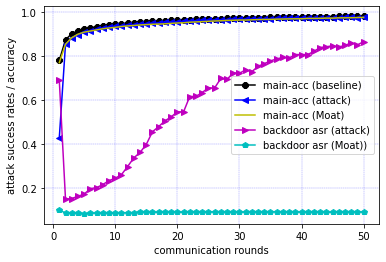

In [17]:
plt.plot(rounds[0][:50], acc_0[0][:50],'k',marker=next(marker),label='main-acc (baseline)')
plt.plot(rounds[0][:50], acc_9[0][:50],'b',marker=next(marker),label='main-acc (attack)')
plt.plot(rounds[0][:50], acc_9[1][:50],'y',label='main-acc (Moat)')
plt.plot(rounds[0][:50], basr_9[0][:50],'m',marker=next(marker),label='backdoor asr (attack)')
plt.plot(rounds[0][:50], basr_9[1][:50],'c',marker=next(marker),label='backdoor asr (Moat))')
plt.xlabel('communication rounds')
plt.ylabel('attack success rates / accuracy')
#plt.title('{} % attacker'.format(30))
plt.grid(color='b', ls = '-.', lw = 0.2)
plt.legend(loc='right')
plt.savefig('grid_mnist_ba_plus_30_percent',dpi=300,bbox_inches='tight')

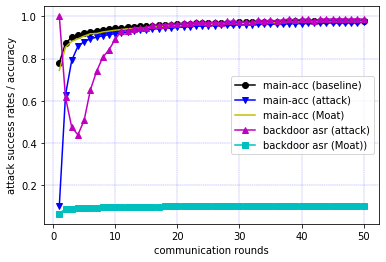

In [18]:
plt.plot(rounds[0][:50], acc_0[0][:50],'k',marker=next(marker),label='main-acc (baseline)')
plt.plot(rounds[0][:50], acc_18[0][:50],'b',marker=next(marker),label='main-acc (attack)')
plt.plot(rounds[0][:50], acc_18[1][:50],'y',label='main-acc (Moat)')
plt.plot(rounds[0][:50], basr_18[0][:50],'m',marker=next(marker),label='backdoor asr (attack)')
plt.plot(rounds[0][:50], basr_18[1][:50],'c',marker=next(marker),label='backdoor asr (Moat))')
plt.xlabel('communication rounds')
plt.ylabel('attack success rates / accuracy')
#plt.title('{} % attacker'.format(60))
plt.grid(color='b', ls = '-.', lw = 0.2)
plt.legend(loc='right')
plt.savefig('grid_mnist_ba_plus_60_percent',dpi=300,bbox_inches='tight')

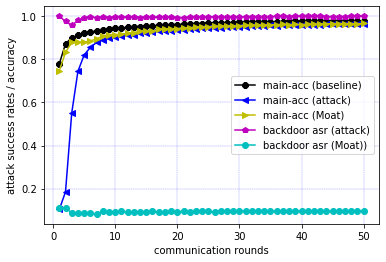

In [19]:
plt.plot(rounds[0][:50], acc_0[0][:50],'k',marker=next(marker),label='main-acc (baseline)')
plt.plot(rounds[0][:50], acc_27[0][:50],'b',marker=next(marker),label='main-acc (attack)')
plt.plot(rounds[0][:50], acc_27[1][:50],'y',marker=next(marker),label='main-acc (Moat)')
plt.plot(rounds[0][:50], basr_27[0][:50],'m',marker=next(marker),label='backdoor asr (attack)')
plt.plot(rounds[0][:50], basr_27[1][:50],'c',marker=next(marker),label='backdoor asr (Moat))')
plt.xlabel('communication rounds')
plt.ylabel('attack success rates / accuracy')
#plt.title('{} % attacker'.format(90))
plt.grid(color='b', ls = '-.', lw = 0.2)
plt.legend(loc='right')
plt.savefig('grid_mnist_ba_plus_90_percent',dpi=300,bbox_inches='tight')